In [1]:
import glob
import numpy as np
import pandas as pd
import json
import fnmatch
import matplotlib.pyplot as plt

In [2]:
list1=glob.glob("../loads 3A/*.mos")
index=0
for file1 in list1:
    index=index+1
    print(file1)
print("Total "+str(index)+" files")

../loads 3A\FullServiceRestaurant-90.1-2004-3A.mos
../loads 3A\FullServiceRestaurant-90.1-2007-3A.mos
../loads 3A\FullServiceRestaurant-90.1-2010-3A.mos
../loads 3A\FullServiceRestaurant-90.1-2013-3A.mos
../loads 3A\FullServiceRestaurant-DOE_Ref_1980-2004-3A.mos
../loads 3A\FullServiceRestaurant-DOE_Ref_Pre-1980-3A.mos
../loads 3A\HighriseApartment-90.1-2004-3A.mos
../loads 3A\HighriseApartment-90.1-2007-3A.mos
../loads 3A\HighriseApartment-90.1-2010-3A.mos
../loads 3A\Hospital-90.1-2004-3A.mos
../loads 3A\Hospital-90.1-2007-3A.mos
../loads 3A\Hospital-90.1-2010-3A.mos
../loads 3A\Hospital-90.1-2013-3A.mos
../loads 3A\Hospital-DOE_Ref_1980-2004-3A.mos
../loads 3A\Hospital-DOE_Ref_Pre-1980-3A.mos
../loads 3A\LargeHotel-90.1-2004-3A.mos
../loads 3A\LargeHotel-90.1-2007-3A.mos
../loads 3A\LargeHotel-90.1-2010-3A.mos
../loads 3A\LargeHotel-90.1-2013-3A.mos
../loads 3A\LargeHotel-DOE_Ref_1980-2004-3A.mos
../loads 3A\LargeHotel-DOE_Ref_Pre-1980-3A.mos
../loads 3A\LargeOffice-90.1-2004-3A.mos

In [3]:
def unique(list_temp):
    x = np.array(list_temp)
    return np.unique(x)

name_list=[]
for file1 in list1:
    name_list.append(file1[12:].split("-")[0])
unique(name_list)

array(['FullServiceRestaurant', 'HighriseApartment', 'Hospital',
       'LargeHotel', 'LargeOffice', 'MediumOffice', 'MidriseApartment',
       'PrimarySchool', 'QuickServiceRestaurant', 'RetailStandalone',
       'RetailStripmall', 'SecondarySchool', 'SmallHotel', 'SmallOffice',
       'Warehouse'], dtype='<U22')

In [4]:
building_name=[
'RetailStripmall',
'FullServiceRestaurant',
'Warehouse',
'SecondarySchool',
'LargeHotel',
'SmallHotel',
'MidriseApartment',
'QuickServiceRestaurant',
'PrimarySchool',
'RetailStandalone',
'HighriseApartment',
'MediumOffice',
'SmallOffice',
'Hospital',
'LargeOffice'
]
building_area=np.array([22500,5500,52045,210887,122120,43200,33740,2500,73960,24962,7836.48*10.7639,53628,5500,241351,498588])*0.092903
building_area=building_area.tolist()
building_dict=dict(zip(building_name,building_area))
print(building_dict)

{'RetailStripmall': 2090.3175, 'FullServiceRestaurant': 510.9665, 'Warehouse': 4835.136635, 'SecondarySchool': 19592.034961, 'LargeHotel': 11345.31436, 'SmallHotel': 4013.4096, 'MidriseApartment': 3134.54722, 'QuickServiceRestaurant': 232.2575, 'PrimarySchool': 6871.10588, 'RetailStandalone': 2319.044686, 'HighriseApartment': 7836.469042250015, 'MediumOffice': 4982.202084, 'SmallOffice': 510.9665, 'Hospital': 22422.231953, 'LargeOffice': 46320.320964}


In [5]:
name_list2=unique(name_list)
for i in range(len(name_list2)):
    print(building_dict.get(name_list2[i]))

510.9665
7836.469042250015
22422.231953
11345.31436
46320.320964
4982.202084
3134.54722
6871.10588
232.2575
2319.044686
2090.3175
19592.034961
4013.4096
510.9665
4835.136635


In [28]:
for i in range(len(list1)):
    df = pd.read_csv(list1[i], sep=";", skiprows=np.arange(17).tolist(), header=None, names=["time", "SH(W)", "SC(W)", "DHW(W)"])
    name = list1[i][12:].split("-")[0]
    area = building_dict.get(name)
    df["SH(W/m2)"]=df["SH(W)"]/area
    df["SC(W/m2)"]=df["SC(W)"]/area
    df.to_csv('../base loads/'+list1[i][12:-4]+'.csv', sep='\t')

In [4]:
BIM=pd.read_csv('../berkeley/Berkeley_UrbanSim.csv') 
with open('../berkeley/TypeID.json') as json_file:
    ID = json.load(json_file)

In [5]:
index=[]
btype=[]
for i in range(len(ID)):
    index.append(ID[i]['TypeId'])
    btype.append(ID[i]['Occupancy'])
id_dict=dict(zip(index,btype))
id_dict

{0: 'Other/Unknown',
 1: 'Residential',
 2: 'Residential',
 3: 'Residential',
 4: 'Office',
 5: 'Hotel',
 6: 'School',
 7: 'Industrial',
 8: 'Industrial',
 9: 'Industrial',
 10: 'Retail',
 11: 'Retail',
 12: 'Residential',
 13: 'Retail',
 14: 'Office',
 15: 'Parking',
 16: 'Parking'}

In [6]:
BIM.head()

,ID,Area,Stories,Year Built,Type ID,Latitude,Longitude
0,2904,0.0,1,1939,4,37.866114,-122.255944
1,2931,2000.0,1,1935,10,37.866025,-122.291478
2,3100,2092.0,2,1955,1,37.858314,-122.240140
3,2953,12000.0,2,1944,0,37.877161,-122.260828
4,2974,5704.0,2,1950,3,37.876771,-122.259673


In [7]:
name_dict={}
for name in name_list: 
    name_dict[name]=[]
for i in range(len(list1)):
    name=list1[i][12:].split('-')[0]
    if 'DOE_Ref_Pre' in name:
        name_dict[name].append(1980)
    elif 'DOE_Ref' in name:
        name_dict[name].append(1993)
    else:
        name_dict[name].append(int(list1[i][12:].split("-")[2]))
name_dict

{'FullServiceRestaurant': [2004, 2007, 2010, 2013, 2004, 1980],
 'HighriseApartment': [2004, 2007, 2010],
 'Hospital': [2004, 2007, 2010, 2013, 2004, 1980],
 'LargeHotel': [2004, 2007, 2010, 2013, 2004, 1980],
 'LargeOffice': [2004, 2007, 2010, 2013, 2004, 1980],
 'MediumOffice': [2004, 2007, 2010, 2013, 2004, 1980],
 'MidriseApartment': [2004, 2007, 2010, 2013, 2004, 1980],
 'PrimarySchool': [2004, 2007, 2010, 2013, 2004, 1980],
 'QuickServiceRestaurant': [2004, 2007, 2010, 2013, 2004, 1980],
 'RetailStandalone': [2004, 2007, 2010, 2013],
 'RetailStripmall': [2004, 2007, 2010, 2013, 2004, 1980],
 'SecondarySchool': [2004, 2007, 2010, 2013, 2004, 1980],
 'SmallHotel': [2004, 1980],
 'SmallOffice': [2004, 2007, 2010, 2013, 2004, 1980],
 'Warehouse': [2004, 2007, 2010, 2013, 2004, 1980]}

In [8]:
def load_generate(name_list,area_list_org,year_list):
    area_list=area_list_org.copy()
    def closest(lst, K):
        lst = np.asarray(lst)
        idx = (np.abs(lst - K)).argmin()
        return idx
    def which_school(area):
        area_list=[73960,210900]
        name_list=['PrimarySchool','SecondarySchool']
        return name_list[closest(area_list, area)]
    def which_hotel(area):
        area_list=[43200,122132]
        name_list=['SmallHotel','LargeHotel']
        return name_list[closest(area_list, area)]
    def which_office(area):
        area_list=[5500,53600,498600]
        name_list=['SmallOffice','MediumOffice','LargeOffice']
        return name_list[closest(area_list, area)]
    def which_residential(area):
        area_list=[33700,84360]
        name_list=['MidriseApartment','HighriseApartment']
        return name_list[closest(area_list, area)]
    name_dict={'Retail':'RetailStandalone','Industrial':'Warehouse','School':which_school,'Hotel':which_hotel,\
               'Office':which_office,'Residential':which_residential}
    year_dict={'FullServiceRestaurant': [2004, 2007, 2010, 2013, 2004, 1980],
 'HighriseApartment': [2004, 2007, 2010],
 'Hospital': [2004, 2007, 2010, 2013, 2004, 1980],
 'LargeHotel': [2004, 2007, 2010, 2013, 2004, 1980],
 'LargeOffice': [2004, 2007, 2010, 2013, 2004, 1980],
 'MediumOffice': [2004, 2007, 2010, 2013, 2004, 1980],
 'MidriseApartment': [2004, 2007, 2010, 2013, 2004, 1980],
 'PrimarySchool': [2004, 2007, 2010, 2013, 2004, 1980],
 'QuickServiceRestaurant': [2004, 2007, 2010, 2013, 2004, 1980],
 'RetailStandalone': [2004, 2007, 2010, 2013],
 'RetailStripmall': [2004, 2007, 2010, 2013, 2004, 1980],
 'SecondarySchool': [2004, 2007, 2010, 2013, 2004, 1980],
 'SmallHotel': [2004, 1980],
 'SmallOffice': [2004, 2007, 2010, 2013, 2004, 1980],
 'Warehouse': [2004, 2007, 2010, 2013, 2004, 1980]}
    new_name_list=[]
    new_year_list=[]
    index=0
    for name in name_list:
        if name=='Other/Unknown' or name=='Parking':
            new_name_list.append(None)
            area_list[index]=None
        else:
            if type(name_dict[name])==str:
                new_name_list.append(name_dict[name])
            else:
                new_name_list.append(name_dict[name](area_list[index]))
        index+=1
    index=0
    for new_name in new_name_list:
        if new_name==None:
            new_year_list.append(None)
        else:
            new_year_list.append(year_dict[new_name][closest(year_dict[new_name],year_list[index])])
        index+=1
    list1=glob.glob("../base loads/*.csv")
    load_array=np.zeros((1,8760))
    load_array2=np.zeros((1,8760))
    new_name_list.remove(None)
    new_year_list.remove(None)
    area_list.remove(None)
    for file1 in list1:
        current_load=pd.read_csv(file1,sep="\t",index_col=0)['SH(W/m2)'].values
        current_load2=pd.read_csv(file1,sep="\t",index_col=0)['SC(W/m2)'].values
        remove_list1=[]
        remove_list2=[]
        remove_list3=[]
        for i in range(len(new_name_list)):
            if fnmatch.fnmatch(file1,'*'+new_name_list[i]+'*'+str(new_year_list[i])+'*'):
                load_array+=current_load*area_list[i]
                load_array2+=current_load2*area_list[i]
                remove_list1.append(new_name_list[i])
                remove_list2.append(new_year_list[i])
                remove_list3.append(area_list[i])
        for i in range(len(remove_list1)):
            new_name_list.remove(remove_list1[i])
            new_year_list.remove(remove_list2[i])
            area_list.remove(remove_list3[i])
        if new_name_list==[]:
            break
    time_array=pd.read_csv(file1,sep="\t",index_col=0)['time'].values
    return time_array,load_array,load_array2

In [9]:
BIM_test=BIM.loc[0:10]
BIM_test['Type']=BIM_test['Type ID'].map(id_dict)

C:\Users\m1371\AppData\Local\Temp/ipykernel_11152/1876524093.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BIM_test['Type']=BIM_test['Type ID'].map(id_dict)


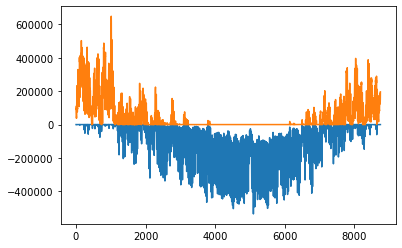

In [11]:
name_list=BIM_test.Type.values.tolist()
area_list=BIM_test.Area.values.tolist()
year_list=BIM_test['Year Built'].values.tolist()
time_array,load_array,load_array2=load_generate(name_list,area_list,year_list)
plt.plot(load_array[0])
plt.plot(load_array2[0])
plt.show()

In [12]:
print(name_list,area_list,year_list)

['Office', 'Retail', 'Residential', 'Other/Unknown', 'Residential', 'Residential', 'Residential', 'Residential', 'Residential', 'Residential', 'Residential'] [0.0, 2000.0, 2092.0, 12000.0, 5704.0, 2484.0, 3227.0, 3001.0, 3686.0, 2556.0, 1663.78168077] [1939, 1935, 1955, 1944, 1950, 1995, 1995, 2007, 2002, 1994, 1988]


In [13]:
from energy_read import length,length_generate

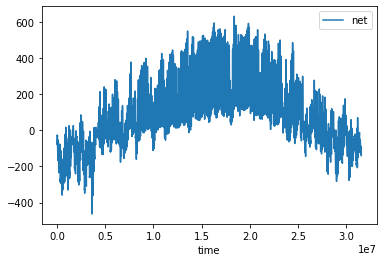

In [14]:
net=load_array[0]*6.5/5.5+load_array2[0]*2.5/3.5
d = {'time': time_array, 'net': -net/1000}
df = pd.DataFrame(data=d)
df.plot(x='time',y='net')
df=df.set_index('time')

In [15]:
length(df,6,False)

13.483253193768299

In [16]:
length_generate(name_list,area_list,year_list)

13.483253193768299